# O que vende um carro?

Você é analista na Lista de Eixo de Manivela. Centenas de propagandas gratuitas de veículos são publicadas no seu site todos os dias. Você precisa estudar os dados coletados nos últimos anos e determinar quais fatores influenciaram o preço de um veículo.

## Início

In [2]:
# Carregando todas as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date


### Carregando dados

In [3]:
# Carregando o arquivo com os dados em um DataFrame

try:
    df = pd.read_csv(r'vehicles_us.csv')

except:
    df = pd.read_csv(r'/datasets/vehicles_us.csv')


### Explorando os dados iniciais

O conjunto de dados contém os seguintes campos:
- `price` — preço do veículo
- `model_year` — ano do modelo
- `model` — o modelo
- `condition` — as condições
- `cylinders` — quantidade de cilindros
- `fuel` — gasolina, diesel etc.
- `odometer` — a quilometragem do veículo quando a propaganda foi publicada 
- `transmission` — o tipo de transmissão
- `paint_color` — a cor
- `is_4wd` — Se o veículo é 4 por 4 (tipo Booleano)
- `date_posted` — a data que a propaganda foi publicada
- `days_listed` — dias desde a publicação até a retirada

In [4]:
# imprima as informações gerais/resumidas sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
# imprima uma amostragem dos dados
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [6]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [7]:
df[df['odometer'] == 0]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
352,7997,2009.0,gmc yukon,excellent,8.0,gas,0.0,automatic,SUV,white,1.0,2019-03-16,88
814,2995,1999.0,ford f-150,good,6.0,gas,0.0,manual,truck,NaN,NaN,2019-03-14,16
1375,5888,NaN,toyota 4runner,good,6.0,gas,0.0,automatic,SUV,black,NaN,2019-02-22,36
1461,1000,1992.0,gmc sierra 1500,good,8.0,gas,0.0,automatic,truck,NaN,NaN,2018-09-28,47
1970,10988,2000.0,ford f-250 sd,good,8.0,diesel,0.0,automatic,truck,white,1.0,2018-11-21,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49170,3300,2002.0,hyundai santa fe,good,6.0,gas,0.0,automatic,wagon,white,1.0,2019-04-14,31
49284,3300,2002.0,hyundai santa fe,good,6.0,gas,0.0,automatic,wagon,white,1.0,2019-02-15,7
50412,25500,NaN,jeep wrangler,good,6.0,gas,0.0,automatic,SUV,yellow,1.0,2018-06-12,48
50631,3600,2012.0,chrysler 200,good,4.0,gas,0.0,automatic,sedan,red,NaN,2018-07-24,90


In [8]:
df[df['price'] == 1]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
405,1,2014.0,chevrolet camaro,excellent,6.0,gas,71310.0,automatic,coupe,NaN,NaN,2018-07-14,29
3063,1,1998.0,chevrolet silverado,good,8.0,gas,164000.0,automatic,pickup,NaN,1.0,2018-10-11,49
3808,1,2007.0,chevrolet tahoe,good,8.0,gas,200.0,automatic,SUV,red,NaN,2019-03-18,63
3902,1,1996.0,ford f-150,fair,NaN,gas,163000.0,manual,truck,white,NaN,2019-02-23,54
4140,1,2004.0,chevrolet silverado,excellent,8.0,diesel,83000.0,automatic,pickup,NaN,1.0,2019-02-04,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49699,1,2007.0,chevrolet trailblazer,excellent,8.0,gas,NaN,automatic,SUV,black,1.0,2018-08-06,28
49709,1,NaN,ford f150,excellent,8.0,gas,139700.0,other,pickup,red,1.0,2019-03-11,18
50245,1,1986.0,chevrolet silverado,good,8.0,gas,NaN,automatic,truck,red,1.0,2018-11-30,50
50393,1,2003.0,gmc sierra 2500hd,good,8.0,diesel,212300.0,automatic,pickup,black,1.0,2019-04-12,28


In [9]:
df.isna().mean()*100

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

In [10]:
ausentes = (df.isna().sum().sum() / df.shape[0]) * 100
print(f'A presença de dados ausentes no DataFrame é de: {round(ausentes, 2)}%')


A presença de dados ausentes no DataFrame é de: 100.9%


In [11]:
df.is_4wd.unique()

array([ 1., nan])

A porcentagem mostrada acima, está bem errada. Mas isso é devido aos dados da coluna is_4wd que é composta por 2 valores, 1 e NaN, este último deveria ser 0, mas por algum motivo que não sabemos ele está como ausente. 
Bem, isso será consertado mais para frente.

In [12]:
df[df['model_year'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37


In [13]:
df.condition.unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [14]:
df.fuel.unique()

array(['gas', 'diesel', 'other', 'hybrid', 'electric'], dtype=object)

In [15]:
df.paint_color.unique()

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

In [16]:
df.type.unique()

array(['SUV', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'offroad', 'bus'],
      dtype=object)

In [17]:
# Aqui esta o problema das duplicadas implícitas

df.model.unique()

array(['bmw x5', 'ford f-150', 'hyundai sonata', 'chrysler 200',
       'chrysler 300', 'toyota camry', 'honda pilot', 'kia sorento',
       'chevrolet silverado 1500', 'honda accord', 'ram 1500',
       'gmc yukon', 'jeep cherokee', 'chevrolet traverse',
       'hyundai elantra', 'chevrolet tahoe', 'toyota rav4',
       'chevrolet silverado', 'jeep wrangler', 'chevrolet malibu',
       'ford fusion se', 'chevrolet impala', 'chevrolet corvette',
       'jeep liberty', 'toyota camry le', 'nissan altima',
       'subaru outback', 'toyota highlander', 'dodge charger',
       'toyota tacoma', 'chevrolet equinox', 'nissan rogue',
       'mercedes-benz benze sprinter 2500', 'honda cr-v',
       'jeep grand cherokee', 'toyota 4runner', 'ford focus',
       'honda civic', 'kia soul', 'chevrolet colorado',
       'ford f150 supercrew cab xlt', 'chevrolet camaro lt coupe 2d',
       'chevrolet cruze', 'ford mustang', 'chevrolet silverado 3500hd',
       'nissan frontier crew cab sv', 'subaru imp

In [18]:
df.duplicated().sum()

0

### Primeiras conclusões e próximos passos

Após uma breve análise, foram encontradas algumas colunas com dados inapropriados, como por exemplo, 'date_posted' que estava como 'object' em vez de 'datetime'

Dados ausentes em paint_color, odometer, cylinders e model_year. 2 dessas colunas julgo errado e impossível de preencher, elas são, respectivamente, odometer e paint_color. 
É possível preencher usando média ou mediana a coluna odometer? Sim. Possível é, mas seria o correto? 
Não há informação de como o carro era usado, ou para que ele era usado, se era usado para trabalho, como por exemplo, taxi ou serviço de aplicativos, ou para fazer frete, ou como ferramenta de trabalho de um representante farmacêutico.
Logo, como sabemos que por ser um fator óbvio a kilometragem do veículo é um fator determinante do preço, acredito, neste primeiro momento, que a melhor abordagem seria me abster do preenchimento, e solicitar a averiguação do odometro do veículo para termos informações mais precisas.

E sobre a cor, como não temos alguma foto do veículo anunciado não há como preencher com nenhuma informação.

A respeito dos valores duplicados essas existem duplicatas implícitas na coluna 'model' nos veículos da ford, nas linhas: f-150, f-250 e f-350, há um veículos que houve um pequeno erro foi o 'mercedes-benz **benze** sprinter 2500' que também será consertado.


## Cuidando de valores ausentes

In [19]:
dropped_na = df.dropna()
print(f'O atual Data Frame possui o total de: {dropped_na.shape[0]} dados, de um total de: {df.shape[0]}, que representa um total de {round((dropped_na.shape[0]/df.shape[0])*100, 2)}%, do Data Frame original.\n'
      f'O Data Frame original possui: {df.shape[0]} dados, sendo esses {df.isna().sum().sum()} ausentes, que corresponte a {round((df.isna().sum().sum()/df.shape[0])*100, 2)}%. '
      
      
      )

O atual Data Frame possui o total de: 14852 dados, de um total de: 51525, que representa um total de 28.82%, do Data Frame original.
O Data Frame original possui: 51525 dados, sendo esses 51991 ausentes, que corresponte a 100.9%. 


In [20]:
df['is_4wd'].fillna(0, inplace = True)
df['is_4wd'].astype(int)
df['paint_color'].fillna('unknow', inplace=True)



In [21]:
dropped_na = df.dropna()

print(f'O atual Data Frame possui o total de: {dropped_na.shape[0]} dados, de um total de: {df.shape[0]}, que representa um total de {round((dropped_na.shape[0]/df.shape[0])*100, 2)}%, do Data Frame original.\n'
      f'O Data Frame original possui: {df.shape[0]} dados, sendo esses {df.isna().sum().sum()} ausentes, que corresponte a {round((df.isna().sum().sum()/df.shape[0])*100, 2)}%. '
)

O atual Data Frame possui o total de: 36419 dados, de um total de: 51525, que representa um total de 70.68%, do Data Frame original.
O Data Frame original possui: 51525 dados, sendo esses 16771 ausentes, que corresponte a 32.55%. 


In [22]:
cylinders = df.dropna().groupby(['model', 'model_year'])[['cylinders']].mean()
cylinders

cylinders
model             model_year           
acura tl          1999.0       6.000000
                  2001.0       6.000000
                  2002.0       6.000000
                  2003.0       6.000000
                  2004.0       5.857143
...                                 ...
volkswagen passat 2014.0       4.030303
                  2015.0       4.047619
                  2016.0       4.285714
                  2017.0       4.000000
                  2018.0       4.000000

[2167 rows x 1 columns]

In [23]:
df['cylinders'] = df.groupby(['model'])['cylinders'].apply(lambda x:x.fillna(int(x.mean())))

In [24]:
df.cylinders.unique()

array([ 6.,  4.,  8.,  5.,  7., 10.,  3., 12.])

In [25]:
dropped_na = df.dropna()

print(f'O atual Data Frame possui o total de: {dropped_na.shape[0]} dados, de um total de: {df.shape[0]}, que representa um total de {round((dropped_na.shape[0]/df.shape[0])*100, 2)}%, do Data Frame original.\n'
      f'O Data Frame original possui: {df.shape[0]} dados, sendo esses {df.isna().sum().sum()} ausentes, que corresponte a {round((df.isna().sum().sum()/df.shape[0])*100, 2)}%.\n'
)

O atual Data Frame possui o total de: 40563 dados, de um total de: 51525, que representa um total de 78.72%, do Data Frame original.
O Data Frame original possui: 51525 dados, sendo esses 11511 ausentes, que corresponte a 22.34%.



In [26]:
df.isna().sum()

price              0
model_year      3619
model              0
condition          0
cylinders          0
fuel               0
odometer        7892
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

## Corrigindo erros superficiais nos dados

In [27]:
df['model'] = df['model'].replace('ford f-150', 'ford f150')
df['model'] = df['model'].replace('ford f-250', 'ford f250')
df['model'] = df['model'].replace(['ford f250 super duty','ford f-250 super duty', 'ford f-250 sd'], 'ford f250 sd')
df['model'] = df['model'].replace('ford f-350', 'ford f350')
df['model'] = df['model'].replace(['ford f350 super duty','ford f-350 sd'], 'ford f350 sd')
df['model'] = df['model'].replace('mercedes-benz benze sprinter 2500', 'mercedes-benz sprinter 2500')
df['model'] = df['model'].str.replace(' ', '_')


In [28]:
df['model'].unique()

array(['bmw_x5', 'ford_f150', 'hyundai_sonata', 'chrysler_200',
       'chrysler_300', 'toyota_camry', 'honda_pilot', 'kia_sorento',
       'chevrolet_silverado_1500', 'honda_accord', 'ram_1500',
       'gmc_yukon', 'jeep_cherokee', 'chevrolet_traverse',
       'hyundai_elantra', 'chevrolet_tahoe', 'toyota_rav4',
       'chevrolet_silverado', 'jeep_wrangler', 'chevrolet_malibu',
       'ford_fusion_se', 'chevrolet_impala', 'chevrolet_corvette',
       'jeep_liberty', 'toyota_camry_le', 'nissan_altima',
       'subaru_outback', 'toyota_highlander', 'dodge_charger',
       'toyota_tacoma', 'chevrolet_equinox', 'nissan_rogue',
       'mercedes-benz_sprinter_2500', 'honda_cr-v', 'jeep_grand_cherokee',
       'toyota_4runner', 'ford_focus', 'honda_civic', 'kia_soul',
       'chevrolet_colorado', 'ford_f150_supercrew_cab_xlt',
       'chevrolet_camaro_lt_coupe_2d', 'chevrolet_cruze', 'ford_mustang',
       'chevrolet_silverado_3500hd', 'nissan_frontier_crew_cab_sv',
       'subaru_impreza', 

## Enriquecendo e filtrando os dados

In [29]:
df['date_posted'] = pd.to_datetime(df.date_posted)
df['ano_post'] = df['date_posted'].dt.strftime('%Y').astype(int)
df['weekday'] = df['date_posted'].dt.strftime('%A')
df['vehicle_age'] = (df['ano_post'] - df['model_year'] )
df['km_year'] = (df['odometer'] / df['vehicle_age'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    47906 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      43633 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  ano_post      51525 non-null  int32         
 14  weekday       51525 non-null  object        
 15  vehicle_age   47906 non-null  float6

In [30]:
aggfuncs = [ 'count','mean', 'min', 'max', pd.Series.mode]
df_type = df.dropna().groupby('type')['days_listed'].agg(aggfuncs)
round(df_type)

,count,mean,min,max,mode
type,,,,,
SUV,9724,40.0,0,243,24
bus,23,45.0,7,92,29
convertible,357,39.0,0,190,17
coupe,1839,39.0,0,213,31
hatchback,841,41.0,0,267,24
mini-van,925,40.0,0,165,32
offroad,178,40.0,1,143,16
other,203,38.0,4,151,"[19, 28]"
pickup,5476,39.0,0,225,24


In [31]:
IQR_price = (df['price'].quantile(0.75))-(df['price'].quantile(0.25))
IQR_vehicle_age = (df['vehicle_age'].quantile(0.75))-(df['vehicle_age'].quantile(0.25))
IQR_odometer = (df['odometer'].quantile(0.75))-(df['odometer'].quantile(0.25))
IQR_days = (df['days_listed'].quantile(0.75))-(df['days_listed'].quantile(0.25))

In [32]:
price_min = df['price'].quantile(0.25)-1.5*IQR_price
vehicle_age_min = df['vehicle_age'].quantile(0.25)-1.5*IQR_vehicle_age
odometer_min = df['odometer'].quantile(0.25)-1.5*IQR_odometer
days_min = df['days_listed'].quantile(0.25)-1.5*IQR_days


print(f'O preço dos veículos possuem um limite inferior de {price_min} dólares.\n'
      f'A idade dos veículos até o anúncio ser postado tem limite inferior de {int(vehicle_age_min)} anos.\n'
      f'O limite inferior da quilometragem dos veículos é {odometer_min}km.\n'
      f'O limite inferior dos dias de anúncio dos veículos é {int(days_min)}dias.'
       )


O preço dos veículos possuem um limite inferior de -12758.5 dólares.
A idade dos veículos até o anúncio ser postado tem limite inferior de -8 anos.
O limite inferior da quilometragem dos veículos é -57500.0km.
O limite inferior dos dias de anúncio dos veículos é -32dias.


In [33]:
price_max = df['price'].quantile(0.75)+1.5*IQR_price
vehicle_age_max = df['vehicle_age'].quantile(0.75)+(1.5*IQR_vehicle_age)
odometer_max = df['odometer'].quantile(0.75)+1.5*IQR_odometer
days_max = df['days_listed'].quantile(0.75)+1.5*IQR_days

print(f'O preço dos veículos possuem um limite superior de {price_max} dólares.\n'
      f'A idade dos veículos até o anúncio ser postado tem limite superior de {int(vehicle_age_max)} anos.\n'
      f'O limite superior da quilometragem dos veículos é {odometer_max}km.\n'
      f'O limite superior dos dias de anúncio dos veículos é {int(days_max)} dias.'
       )

O preço dos veículos possuem um limite superior de 34597.5 dólares.
A idade dos veículos até o anúncio ser postado tem limite superior de 24 anos.
O limite superior da quilometragem dos veículos é 282500.0km.
O limite superior dos dias de anúncio dos veículos é 104 dias.


In [34]:
#Criando o DataFrame filtrado
df_filtered = df.dropna().query('(@price_min <= price <= @price_max) and (@vehicle_age_min <= vehicle_age <= @vehicle_age_max) and (@odometer_min <= odometer <= @odometer_max) and (@days_min <= days_listed <= @days_max)')
df_filtered

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ano_post,weekday,vehicle_age,km_year
0,9400,2011.0,bmw_x5,good,6.0,gas,145000.0,automatic,SUV,unknow,1.0,2018-06-23,19,2018,Saturday,7.0,20714.285714
2,5500,2013.0,hyundai_sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,2019,Thursday,6.0,18333.333333
4,14900,2017.0,chrysler_200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2019,Tuesday,2.0,40451.500000
5,14990,2014.0,chrysler_300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,2018,Wednesday,4.0,14488.500000
6,12990,2015.0,toyota_camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,2018,Thursday,3.0,26404.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51518,3750,2005.0,ford_taurus,excellent,6.0,gas,110200.0,automatic,sedan,silver,0.0,2018-08-10,63,2018,Friday,13.0,8476.923077
51520,9249,2013.0,nissan_maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37,2018,Wednesday,5.0,17627.200000
51521,2700,2002.0,honda_civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22,2018,Wednesday,16.0,11343.750000
51522,3950,2009.0,hyundai_sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32,2018,Thursday,9.0,14222.222222


In [35]:
df_filtered.loc[df_filtered['km_year'] == np.inf,'km_year'] = df_filtered['odometer']
df.loc[df['km_year'] == np.inf,'km_year'] = df['odometer']

## Verificando os dados limpos

In [36]:
# Informações gerais/resumidas sobre o DataFrame original

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    47906 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      43633 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  ano_post      51525 non-null  int32         
 14  weekday       51525 non-null  object        
 15  vehicle_age   47906 non-null  float6

In [37]:
# Informações gerais/resumidas sobre o DataFrame filtrado

print(f'O atual Data Frame possui o total de: {df_filtered.shape[0]} dados, de um total de: {df.shape[0]}, que representa um total de {round((df_filtered.shape[0]/df.shape[0])*100, 2)}%, do Data Frame original.')
print()
df_filtered.info()



O atual Data Frame possui o total de: 37048 dados, de um total de: 51525, que representa um total de 71.9%, do Data Frame original.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37048 entries, 0 to 51523
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         37048 non-null  int64         
 1   model_year    37048 non-null  float64       
 2   model         37048 non-null  object        
 3   condition     37048 non-null  object        
 4   cylinders     37048 non-null  float64       
 5   fuel          37048 non-null  object        
 6   odometer      37048 non-null  float64       
 7   transmission  37048 non-null  object        
 8   type          37048 non-null  object        
 9   paint_color   37048 non-null  object        
 10  is_4wd        37048 non-null  float64       
 11  date_posted   37048 non-null  datetime64[ns]
 12  days_listed   37048 non-null  int64         
 13  ano

In [38]:
df_filtered.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed,ano_post,vehicle_age,km_year
count,37048.000000,37048.000000,37048.000000,37048.000000,37048.000000,37048.000000,37048.000000,37048.000000,37048.000000
mean,11231.165407,2010.012146,6.013442,115187.116228,0.485127,36.812325,2018.306494,8.294348,17894.470344
std,7838.545842,5.194915,1.638548,58971.332350,0.499786,23.222234,0.461044,5.206921,12551.118061
min,1.000000,1994.000000,3.000000,0.000000,0.000000,0.000000,2018.000000,0.000000,0.000000
25%,4999.000000,2006.000000,4.000000,73104.000000,0.000000,19.000000,2018.000000,4.000000,10738.568182
50%,8995.000000,2011.000000,6.000000,114091.000000,0.000000,32.000000,2018.000000,8.000000,15018.214286
75%,15990.000000,2014.000000,8.000000,154731.750000,1.000000,51.000000,2019.000000,12.000000,21400.000000
max,34595.000000,2019.000000,12.000000,282493.000000,1.000000,104.000000,2019.000000,24.000000,195700.000000


## Parâmetros fundamentais

Os parâmetros são:
- Preço;
- A idade do veículo quando a propaganda foi colocada;
- Quilometragem;
- Número de cilindros;
- Condição.

In [39]:
# Mudando a coluna condição para valores quantitativos

conditions_dict = {'new': 5, 'like new': 4, 'excellent': 3, 'good': 2, 'fair': 1, 'salvage': 0 }

df['condition'] = df['condition'].replace(conditions_dict)
df['condition'] = df['condition'].replace(conditions_dict)

df.condition.unique()

array([2, 4, 1, 3, 0, 5], dtype=int64)

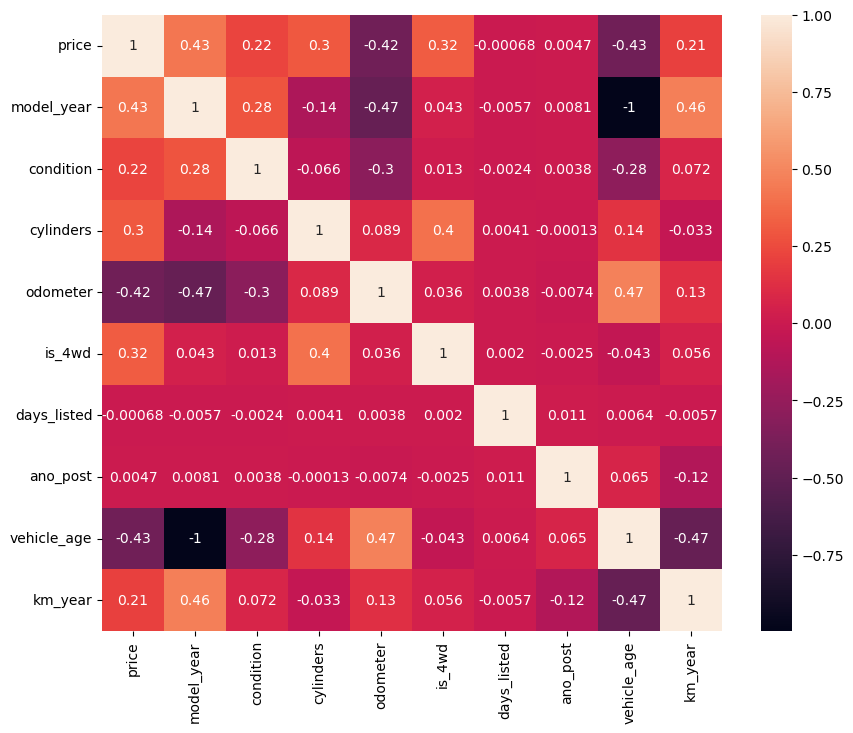

In [40]:
# Correlação do DataFrame original

hm = sns.heatmap(df.corr(), annot=True);
hm.figure.set_size_inches(10, 8)


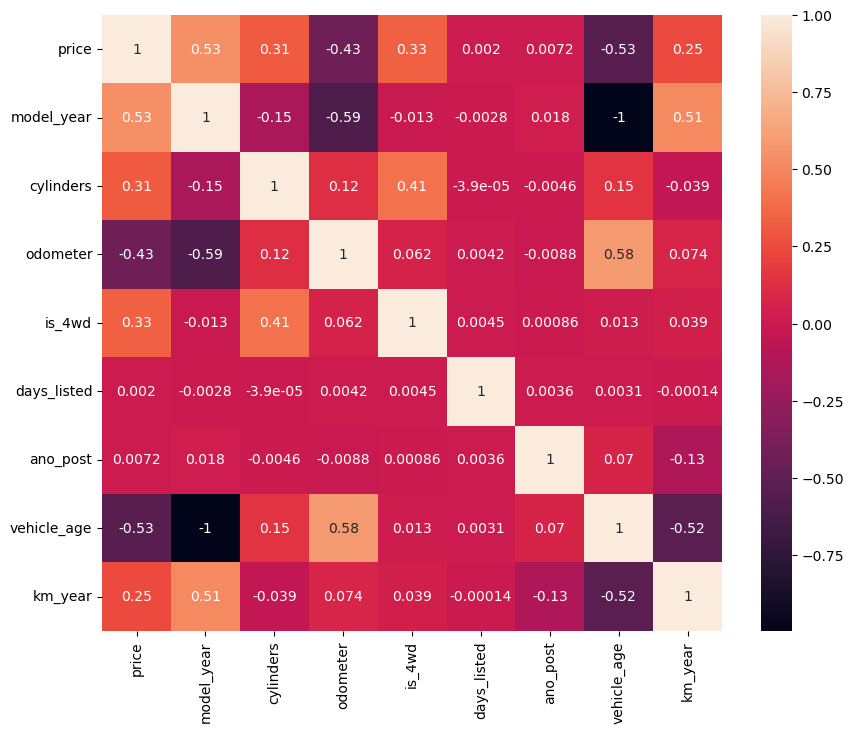

In [41]:
# Correlação do DataFrama filtrado

hm2 = sns.heatmap(df_filtered.corr(), annot=True);
hm2.figure.set_size_inches(10, 8)

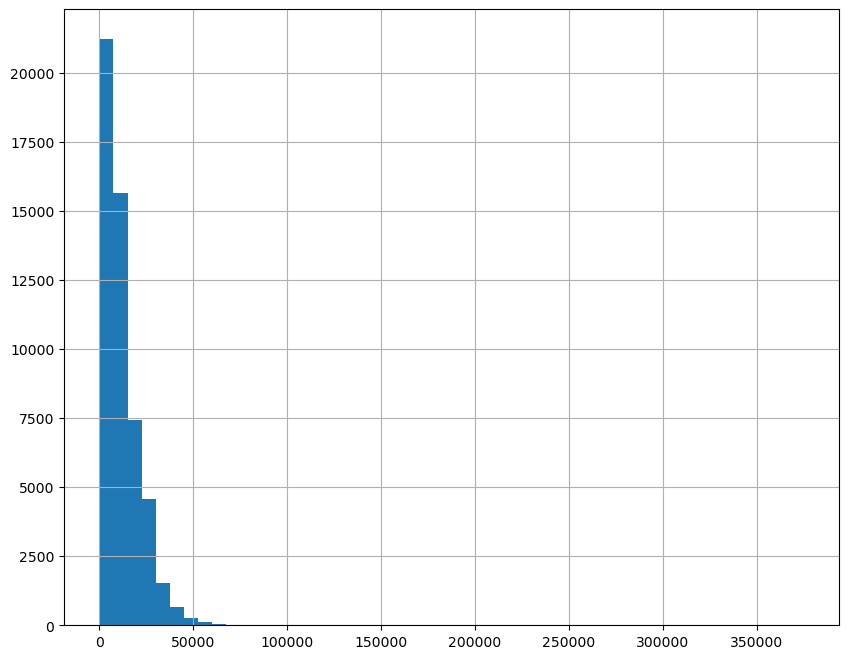

In [42]:
# DataFrame original (preço)

df.price.hist(bins= 50, figsize=(10, 8));


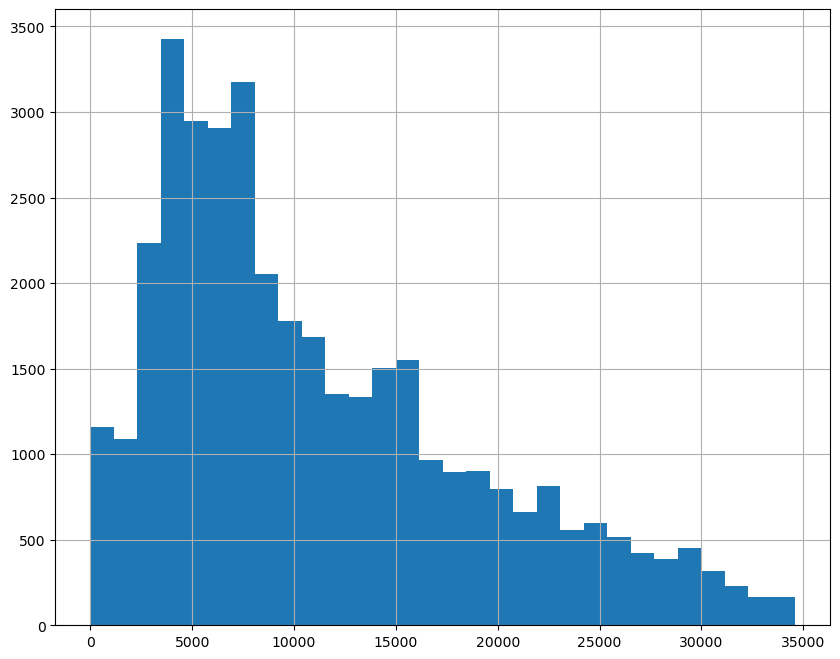

In [43]:
#DataFrame filtrado (preço)

df_filtered.price.hist(bins= 30, figsize=(10, 8));

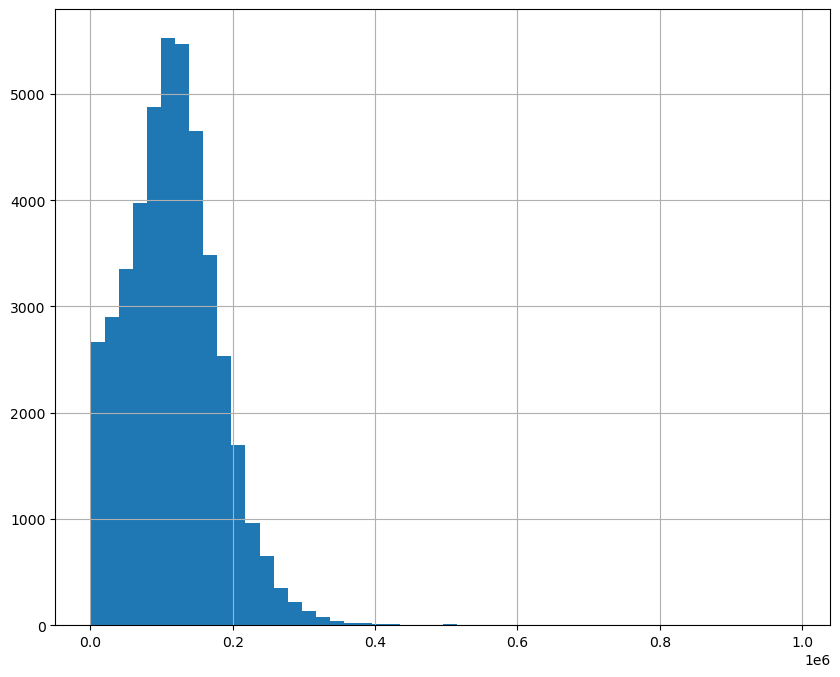

In [44]:
# DataFrame original (kilometragem)

df.odometer.hist(bins= 50, figsize=(10 , 8));

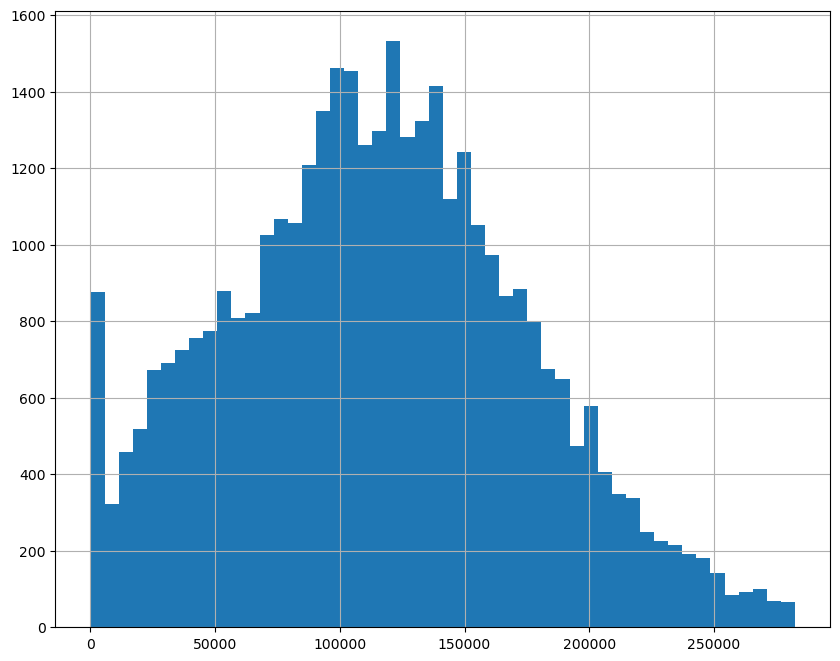

In [45]:
# DataFrame filtrato(kilometragem)

df_filtered.odometer.hist(bins= 50, figsize=(10, 8));

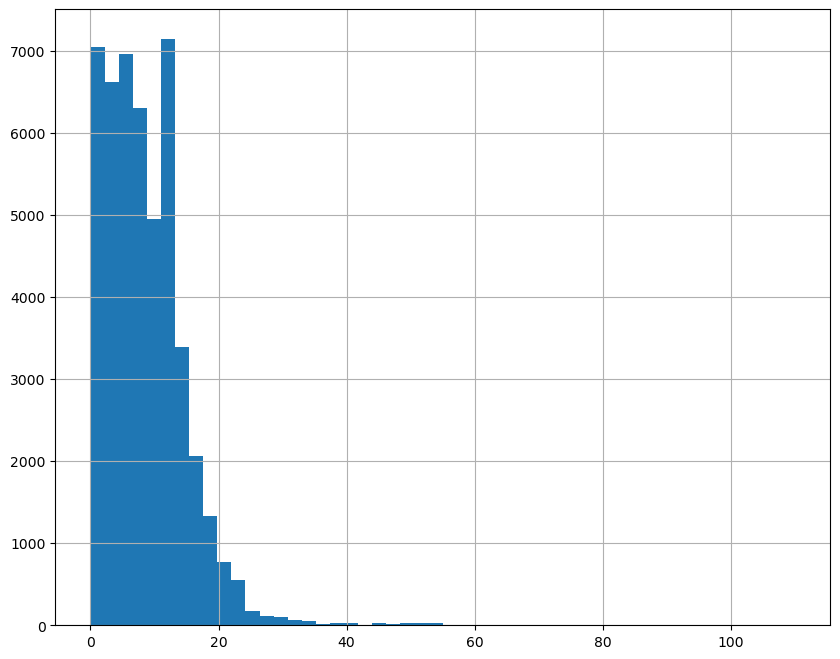

In [46]:
# DataFrame original (idade do veículo)

df.vehicle_age.hist(bins= 50, figsize=(10, 8));

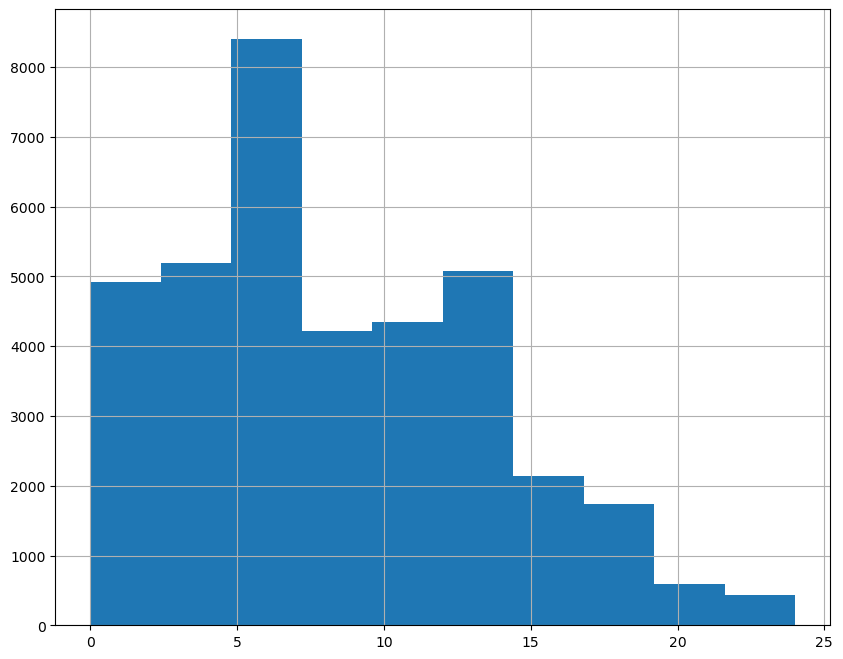

In [47]:
# DataFrame filtrado (idade do veículo)

df_filtered.vehicle_age.hist(figsize=(10, 8));

## Parâmetros fundamentais sem valores atípicos

Com o intuito de não perder  muitos dados do DataFrame reduzi a amostra de dado onde só permaneceria dados acima dos 4% mais baratos, ou seja acima de $1500.

In [48]:
df_filtered.sort_values('price')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ano_post,weekday,vehicle_age,km_year
48889,1,2018.0,ford_f150,excellent,8.0,gas,26265.0,automatic,truck,grey,1.0,2019-03-08,17,2019,Friday,1.0,26265.000000
16750,1,2017.0,jeep_grand_cherokee,excellent,6.0,gas,53718.0,other,SUV,white,1.0,2019-04-10,74,2019,Wednesday,2.0,26859.000000
16751,1,2018.0,chevrolet_tahoe,excellent,8.0,gas,6212.0,automatic,SUV,white,0.0,2018-09-18,21,2018,Tuesday,0.0,6212.000000
16752,1,2018.0,ford_f150,excellent,6.0,gas,17269.0,automatic,truck,silver,0.0,2019-01-09,87,2019,Wednesday,1.0,17269.000000
11016,1,2008.0,ford_mustang,excellent,6.0,gas,91847.0,automatic,hatchback,white,0.0,2018-07-22,13,2018,Sunday,10.0,9184.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29280,34500,2015.0,chevrolet_silverado_3500hd,excellent,8.0,diesel,82237.0,automatic,SUV,white,1.0,2019-04-18,72,2019,Thursday,4.0,20559.250000
42856,34545,2017.0,jeep_wrangler,excellent,6.0,gas,45483.0,automatic,SUV,black,1.0,2019-03-30,23,2019,Saturday,2.0,22741.500000
10269,34555,2018.0,jeep_wrangler,good,5.0,gas,22403.0,automatic,SUV,white,1.0,2018-11-11,20,2018,Sunday,0.0,22403.000000
30391,34595,2015.0,gmc_yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2018-10-28,32,2018,Sunday,3.0,28818.666667


In [49]:
df_filtered.quantile(.04)

price           1500.000000
model_year      2000.000000
cylinders          4.000000
odometer       15070.000000
is_4wd             0.000000
days_listed        6.000000
ano_post        2018.000000
vehicle_age        1.000000
km_year         4321.824444
Name: 0.04, dtype: float64

In [50]:
df_filtered = df_filtered[df_filtered['price'] >= 1500]

print(f'O atual Data Frame filtrado possui o total de: {df_filtered.shape[0]} dados, de um total de: {df.shape[0]}, que representa um total de {round((df_filtered.shape[0]/df.shape[0])*100, 2)}%, do Data Frame original.')

O atual Data Frame filtrado possui o total de: 35709 dados, de um total de: 51525, que representa um total de 69.3%, do Data Frame original.


In [51]:
aggfuncs = [ 'count','mean', 'median', 'min', 'max']
df_filtered.groupby('model')['price'].agg(aggfuncs)

,count,mean,median,min,max
model,,,,,
acura_tl,179,6488.960894,5900.0,1500,14498
bmw_x5,196,10458.066327,9900.0,1500,32000
buick_enclave,207,11619.961353,9999.0,2095,34500
cadillac_escalade,201,13295.273632,13900.0,1999,32595
chevrolet_camaro,261,13392.919540,12995.0,1500,34000
...,...,...,...,...,...
toyota_sienna,241,9078.792531,6900.0,1750,31939
toyota_tacoma,613,15519.398042,14400.0,1600,34500
toyota_tundra,403,15085.602978,13990.0,2000,34000


## Tempo de vida das propagandas


In [52]:
df_filtered.pivot_table(index=['type','condition'], values='days_listed', aggfunc=['count','mean', 'median'])

count        mean      median
                days_listed days_listed days_listed
type  condition                                    
SUV   excellent        4562   36.819597        33.0
      fair              158   39.120253        33.5
      good             3158   37.080114        33.0
      like new          802   36.690773        32.0
      new                11   27.909091        30.0
...                     ...         ...         ...
van   new                 1   12.000000        12.0
wagon excellent         542   36.974170        33.0
      fair               12   42.916667        42.5
      good              506   37.332016        34.0
      like new           52   36.961538        32.5

[64 rows x 3 columns]

In [53]:
aggfuncs = [ 'count','mean', 'min', 'max', pd.Series.mode]
df_condition = df_filtered.groupby('condition')['days_listed'].agg(aggfuncs)
round(df_condition)

,count,mean,min,max,mode
condition,,,,,
excellent,17135,37.0,0,104,18
fair,813,36.0,0,104,21
good,14485,37.0,0,104,24
like new,3161,36.0,0,104,14
new,66,37.0,2,101,38
salvage,49,39.0,7,96,12


In [54]:
# Info dos dias de propaganda - filtrado

aggfuncs = [ 'count','mean', 'min', 'max', pd.Series.mode]
df_type_filtered = df_filtered.groupby('type')['days_listed'].agg(aggfuncs)
round(df_type)

,count,mean,min,max,mode
type,,,,,
SUV,9724,40.0,0,243,24
bus,23,45.0,7,92,29
convertible,357,39.0,0,190,17
coupe,1839,39.0,0,213,31
hatchback,841,41.0,0,267,24
mini-van,925,40.0,0,165,32
offroad,178,40.0,1,143,16
other,203,38.0,4,151,"[19, 28]"
pickup,5476,39.0,0,225,24


In [55]:
# Info dos dias de propaganda - original

aggfuncs = [ 'count','mean', 'min', 'max', pd.Series.mode]
df_type_original = df.groupby('type')['days_listed'].agg(aggfuncs)
round(df_type)

,count,mean,min,max,mode
type,,,,,
SUV,9724,40.0,0,243,24
bus,23,45.0,7,92,29
convertible,357,39.0,0,190,17
coupe,1839,39.0,0,213,31
hatchback,841,41.0,0,267,24
mini-van,925,40.0,0,165,32
offroad,178,40.0,1,143,16
other,203,38.0,4,151,"[19, 28]"
pickup,5476,39.0,0,225,24


In [56]:
# Dados de dias listados que ultrapassam o limite superior, ou seja, outliers.
df.query('days_listed > @days_max')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ano_post,weekday,vehicle_age,km_year
15,17990,2013.0,ram_1500,3,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111,2018,Tuesday,5.0,NaN
34,9500,2008.0,toyota_highlander,2,6.0,gas,149799.0,automatic,SUV,unknow,0.0,2018-06-04,121,2018,Monday,10.0,14979.900000
51,3800,2012.0,ford_focus,2,4.0,gas,130323.0,automatic,sedan,black,0.0,2018-11-29,261,2018,Thursday,6.0,21720.500000
89,18800,2015.0,chevrolet_camaro_lt_coupe_2d,2,6.0,gas,33926.0,other,coupe,grey,0.0,2019-01-16,152,2019,Wednesday,4.0,8481.500000
104,22900,2014.0,ford_f150_supercrew_cab_xlt,2,6.0,gas,73711.0,automatic,pickup,white,1.0,2019-02-27,141,2019,Wednesday,5.0,14742.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51368,2775,2007.0,ford_focus,3,4.0,gas,111450.0,automatic,sedan,silver,0.0,2018-08-23,141,2018,Thursday,11.0,10131.818182
51374,9700,2010.0,honda_odyssey,2,6.0,gas,105656.0,automatic,mini-van,grey,0.0,2019-01-18,111,2019,Friday,9.0,11739.555556
51407,5495,2006.0,jeep_liberty,2,6.0,gas,108388.0,automatic,wagon,white,1.0,2018-12-24,106,2018,Monday,12.0,9032.333333
51489,1200,2005.0,volkswagen_jetta,1,5.0,gas,185000.0,automatic,sedan,grey,0.0,2018-10-10,158,2018,Wednesday,13.0,14230.769231


In [57]:
aggfuncs = [ 'count','mean', 'min', 'max']
df.query('days_listed > @days_max').groupby('type')['days_listed'].agg(aggfuncs).sort_values('max', ascending=False)



,count,mean,min,max
type,,,,
sedan,379,128.540897,105,271
hatchback,31,134.774194,105,267
truck,360,127.450000,105,263
coupe,75,133.120000,105,256
SUV,413,127.121065,105,243
wagon,61,133.639344,105,240
offroad,8,142.375000,111,233
pickup,198,128.217172,105,225
convertible,15,129.800000,106,190


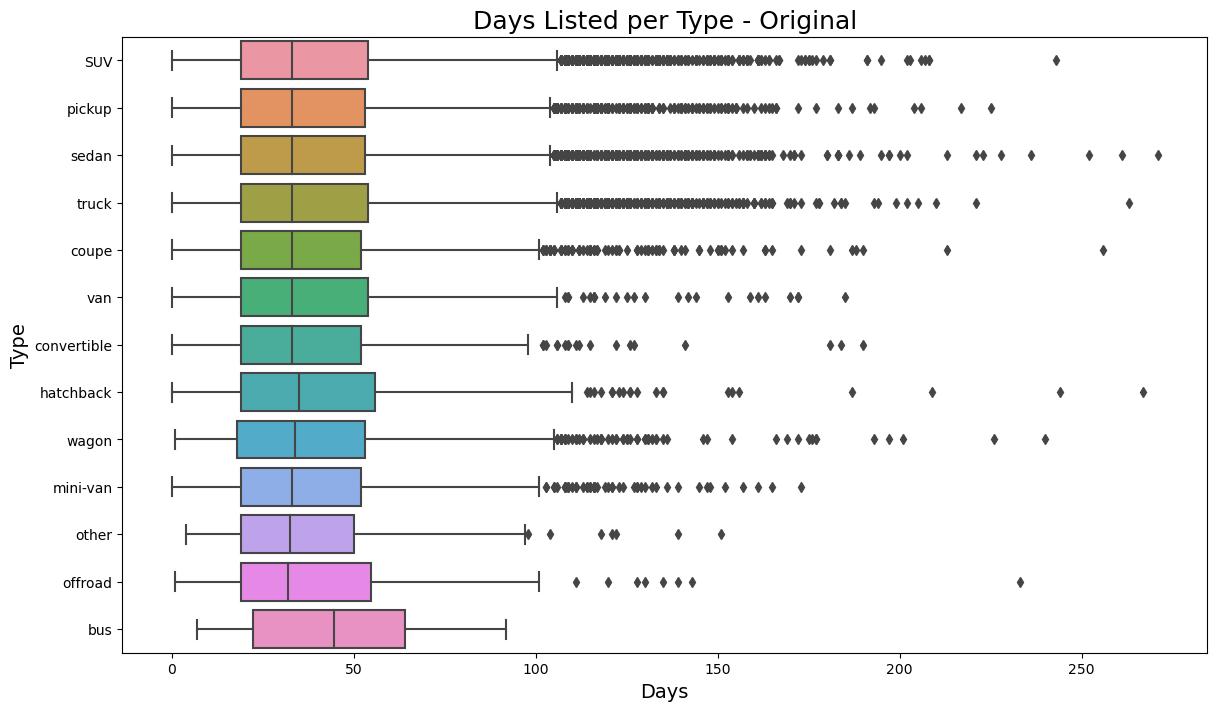

In [58]:
# DataFrame original
dl_original = sns.boxplot(x = 'days_listed', y = 'type', data=df, orient='h')
dl_original.figure.set_size_inches(14, 8)    
dl_original.set_title('Days Listed per Type - Original', fontsize=18)
dl_original.set_xlabel('Days', fontsize=14)
dl_original.set_ylabel('Type', fontsize=14)

dl_original;

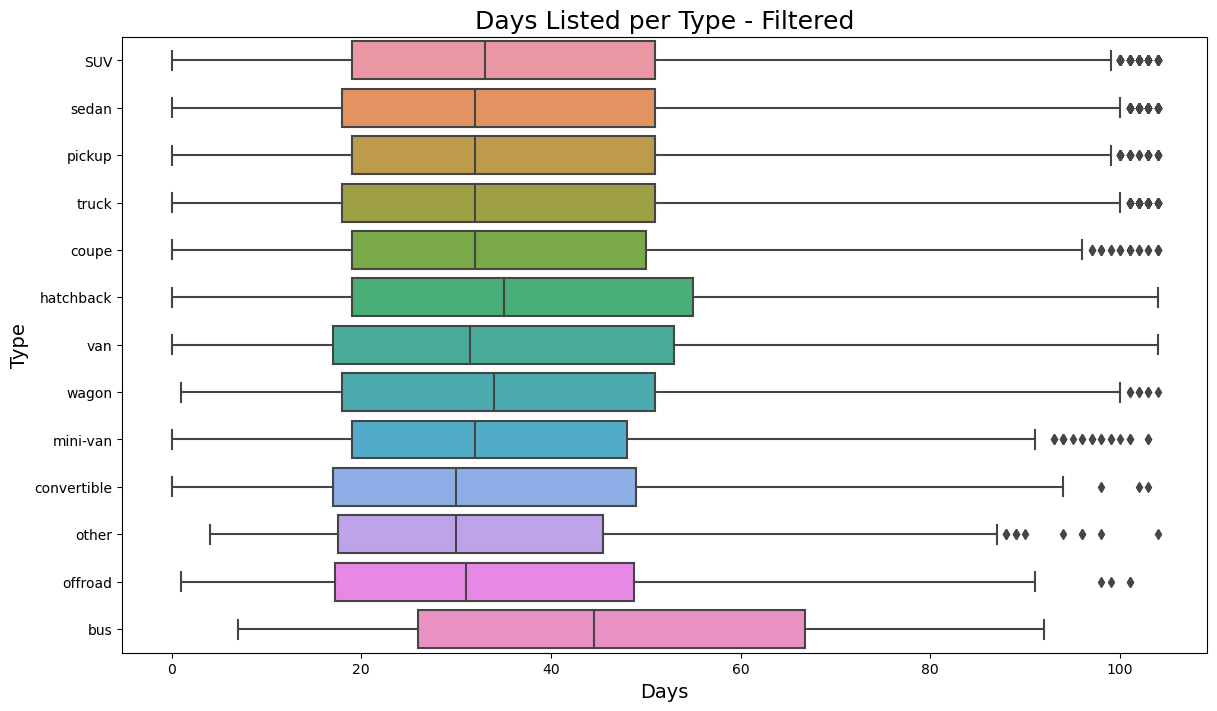

In [59]:
# DataFrame Filtrado
dl_filtered = sns.boxplot(x = 'days_listed', y = 'type', data=df_filtered, orient='h')
dl_filtered.figure.set_size_inches(14, 8)    
dl_filtered.set_title('Days Listed per Type - Filtered', fontsize=18)
dl_filtered.set_xlabel('Days', fontsize=14)
dl_filtered.set_ylabel('Type', fontsize=14)

dl_filtered;

## Média de preços por cada tipo de veículo

In [60]:
# Média e mediana dos tipos de veículos.

aggfuncs = [ 'count','mean', 'median']
df_type = df_filtered.groupby('type')['price'].agg(aggfuncs).sort_values(by='mean', ascending=False)
round(df_type)

,count,mean,median
type,,,
bus,22,16921.0,10500.0
truck,8309,15550.0,14990.0
pickup,4748,15244.0,14500.0
offroad,142,14817.0,12900.0
coupe,1475,14199.0,14000.0
convertible,266,13235.0,12995.0
SUV,8694,10922.0,8995.0
other,179,10373.0,8995.0
van,420,9252.0,7995.0


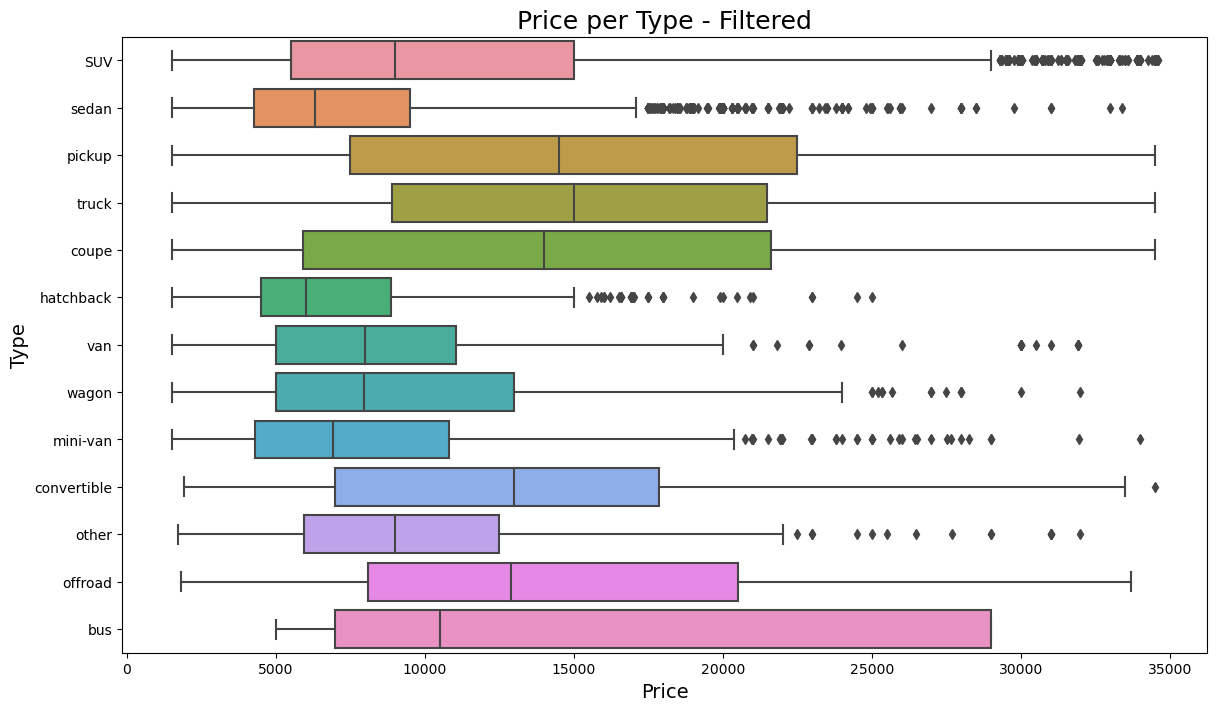

In [61]:
# DataFrame filtrado.

ax = sns.boxplot(x = 'price', y = 'type', data=df_filtered, orient='h')
ax.figure.set_size_inches(14, 8)    
ax.set_title('Price per Type - Filtered', fontsize=18)
ax.set_xlabel('Price', fontsize=14)
ax.set_ylabel('Type', fontsize=14)

ax;

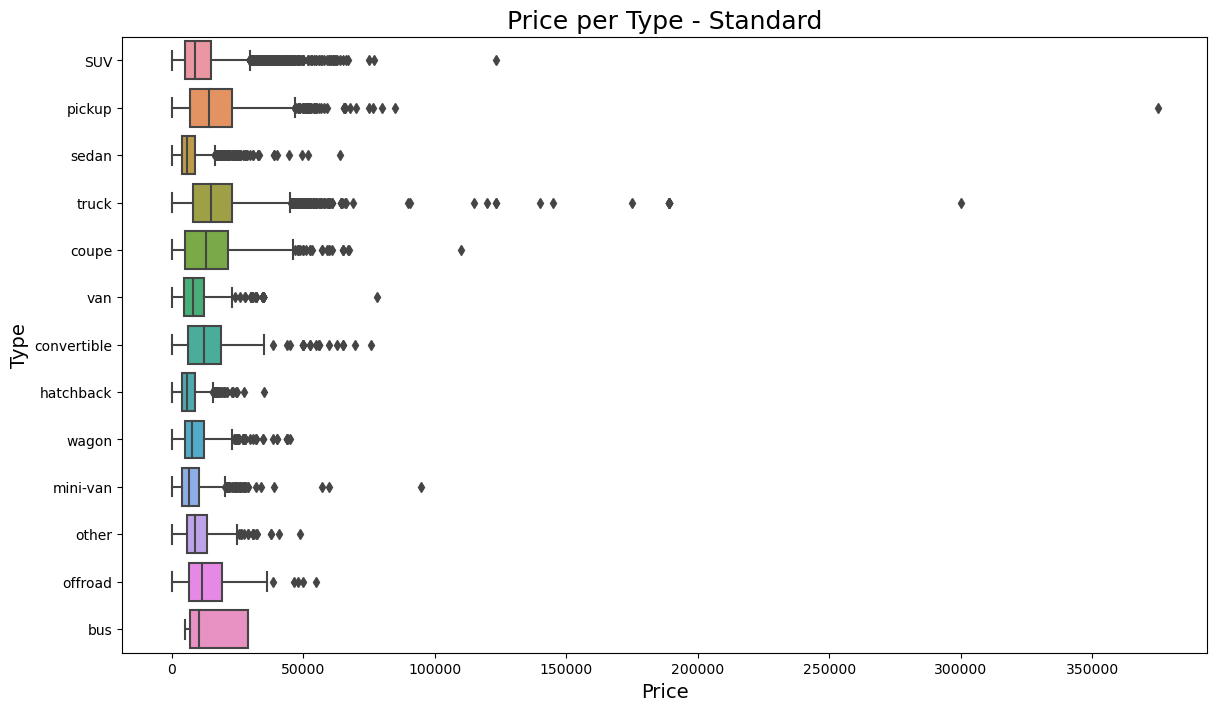

In [62]:
# DataFrame original.

ax2 = sns.boxplot(x = 'price', y = 'type', data=df, orient='h')
ax2.figure.set_size_inches(14, 8)    
ax2.set_title('Price per Type - Standard', fontsize=18)
ax2.set_xlabel('Price', fontsize=14)
ax2.set_ylabel('Type', fontsize=14)

ax2;

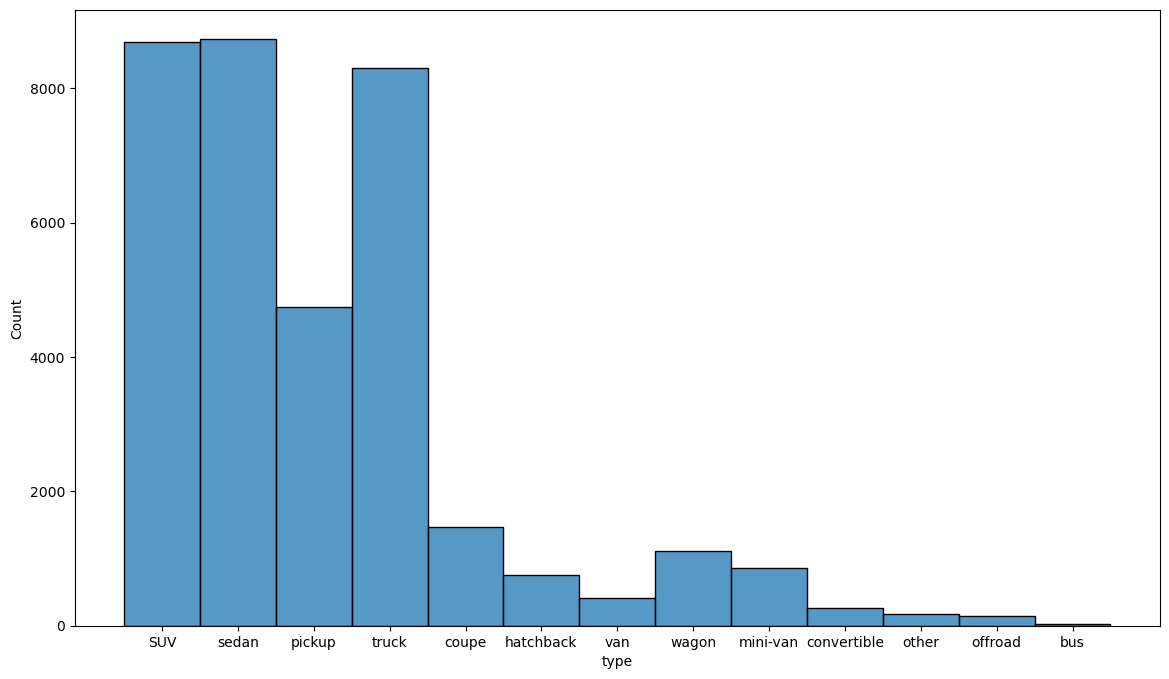

In [63]:
# Anúncios por tipo de veículo.

ax3 = sns.histplot(df_filtered, x='type', stat='count')
ax3.figure.set_size_inches(14, 8)
ax3;

In [64]:
# Média e mediana dos preços dos tipos com a maior contagem de anúncios

aggfuncs = [ 'count','mean', 'median']
df_type = df[(df['type'] == 'SUV') | (df['type'] == 'sedan')].groupby('type')['price'].agg(aggfuncs).sort_values(by='count', ascending=False)
round(df_type)

,count,mean,median
type,,,
SUV,12405,11149.0,8900.0
sedan,12154,6965.0,5995.0


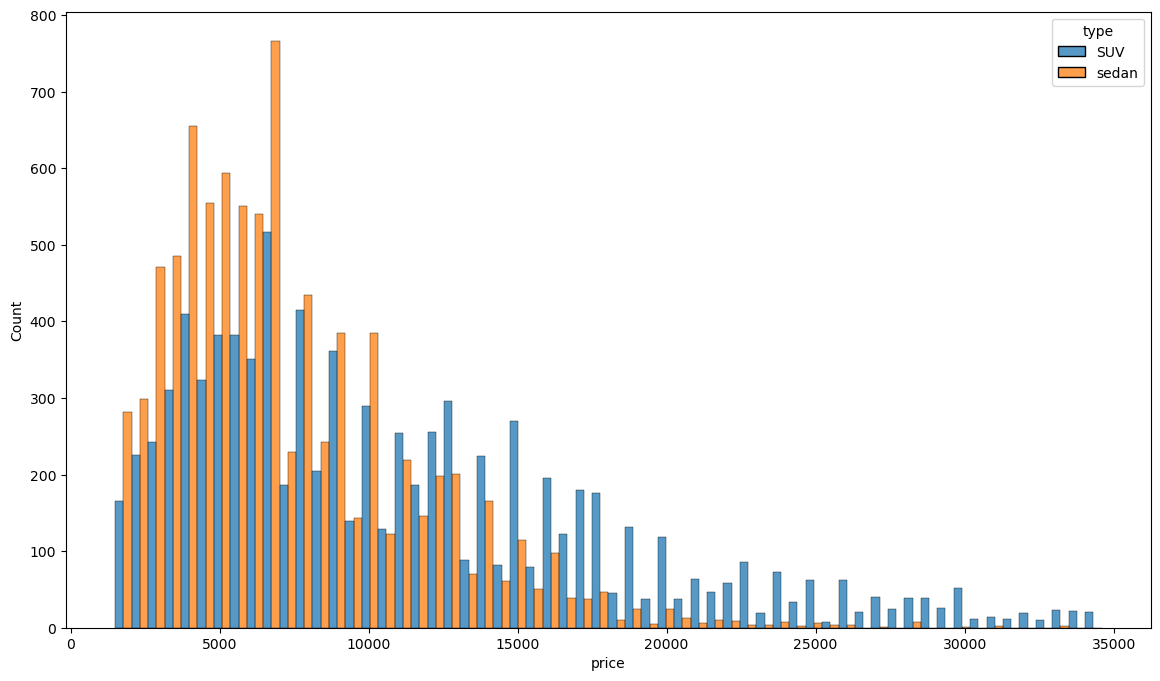

In [65]:
# Número de anúncios por tipo e preço do tipos: Sedan e SUV.

ax3 = sns.histplot(df_filtered.query('(type == "SUV") | (type == "sedan")'), x='price', stat='count', hue='type', multiple='dodge')
ax3.figure.set_size_inches(14, 8)
ax3;

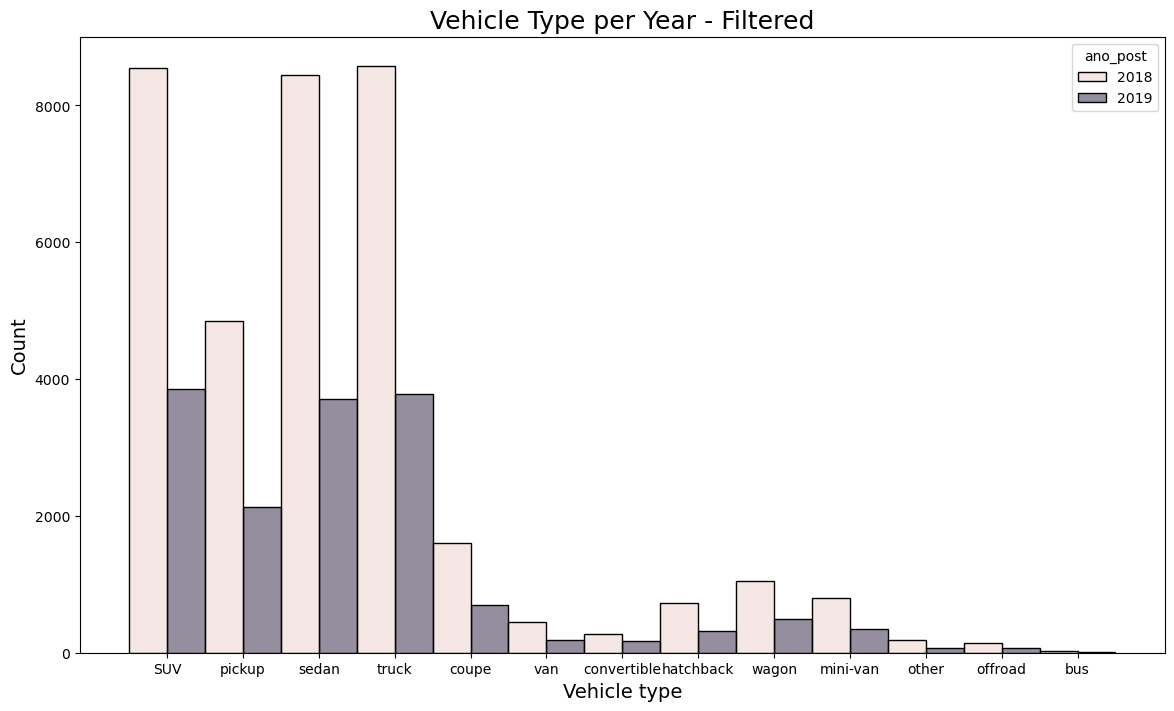

In [66]:
# Quantidade de veículos anunciados em cada ano - DataFrame filtrado

ano_post_graf = sns.histplot(x = 'type', hue='ano_post', data=df, stat='count', alpha=.5, multiple='dodge')
ano_post_graf.figure.set_size_inches(14, 8)    
ano_post_graf.set_title('Vehicle Type per Year - Filtered', fontsize=18)
ano_post_graf.set_xlabel('Vehicle type', fontsize=14)
ano_post_graf.set_ylabel('Count', fontsize=14)

ano_post_graf;

Observa-se que os veículos mais anunciados são os SUVs e os Sedans. Também é visível que houve uma queda nos anúncios de veículos no ano de 2019 em comparação com de 2018.

## Fatores de preço

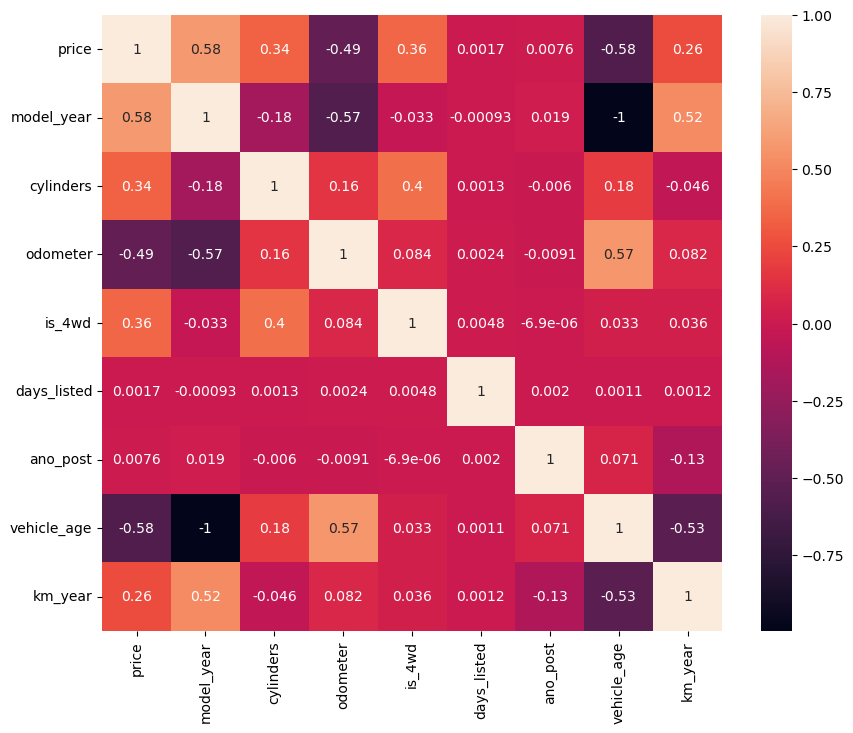

In [67]:
# Correlação geral do DataFrame filtrado
hm3 = sns.heatmap(df_filtered.corr(), annot=True);
hm3.figure.set_size_inches(10, 8)
hm3;

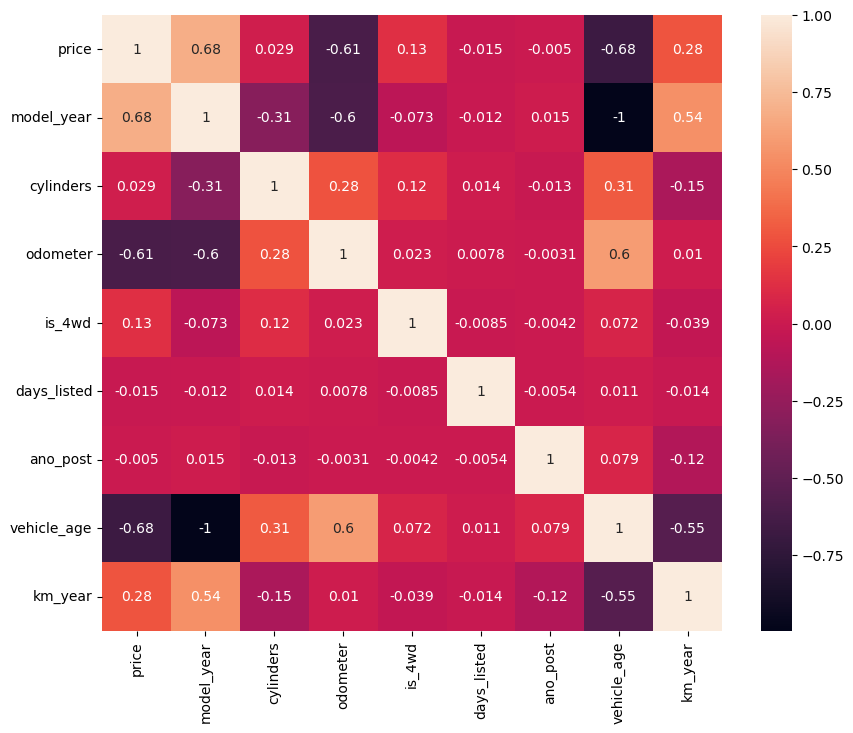

In [68]:
#Correlação dos atributos dos veículos do tipo SUV

hm4 = sns.heatmap(df_filtered[df_filtered['type'] == 'SUV'].corr(), annot=True);
hm4.figure.set_size_inches(10, 8)
hm4;

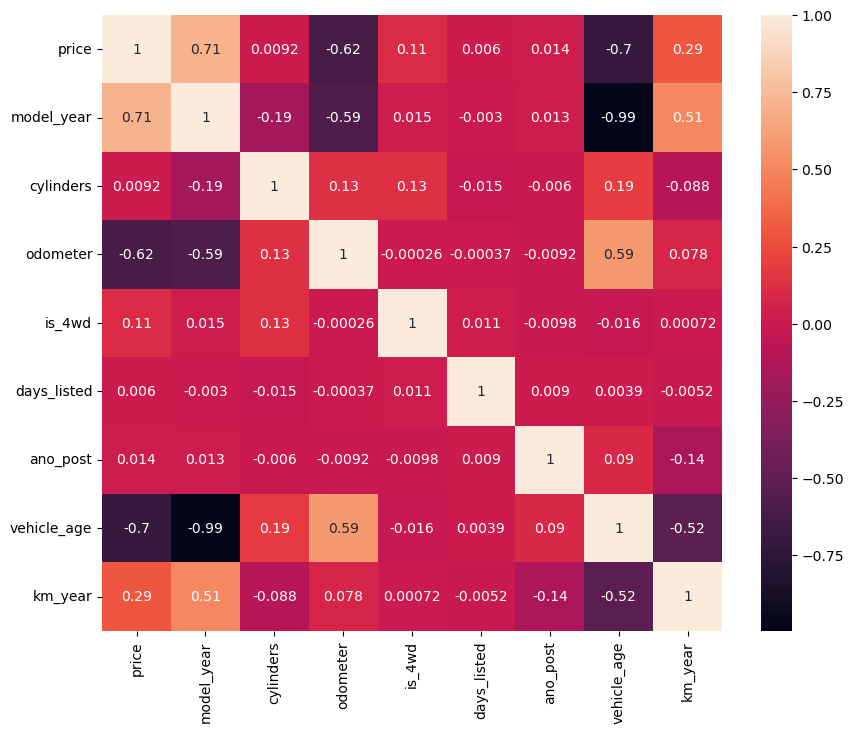

In [69]:
# Correlação de atributos dos veículos do tipo Sedan

hm5 = sns.heatmap(df_filtered[df_filtered['type'] == 'sedan'].corr(), annot=True);
hm5.figure.set_size_inches(10, 8)
hm5;

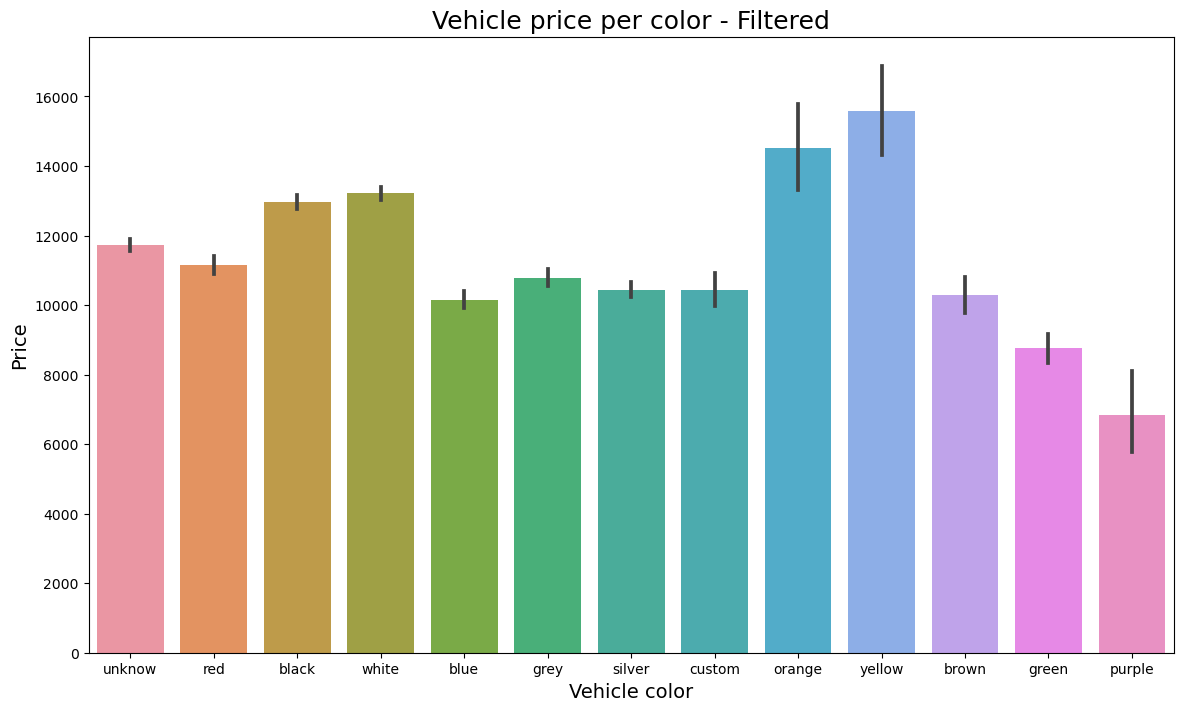

In [70]:
# Preço dos Veículos por cor

paint_coloor_graf = sns.barplot(x = 'paint_color', y='price', data=df_filtered, alpha=1)
paint_coloor_graf.figure.set_size_inches(14, 8)    
paint_coloor_graf.set_title('Vehicle price per color - Filtered', fontsize=18)
paint_coloor_graf.set_xlabel('Vehicle color', fontsize=14)
paint_coloor_graf.set_ylabel('Price', fontsize=14)

paint_coloor_graf;

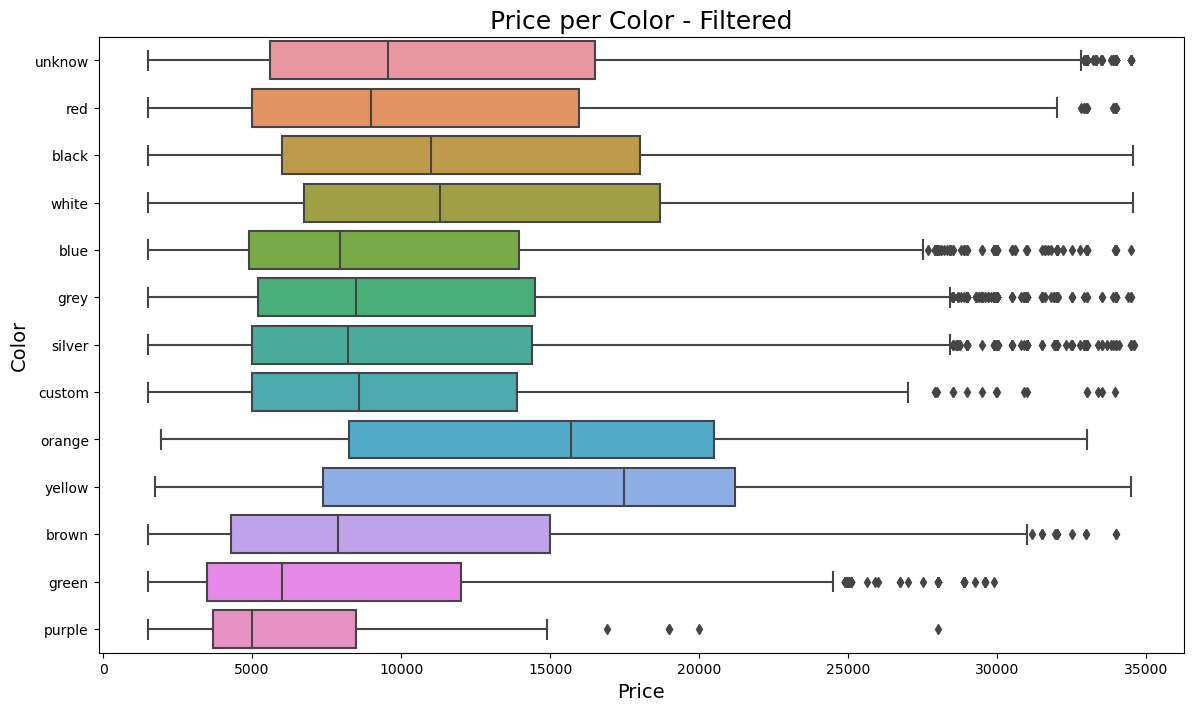

In [71]:
# Gráfico em caixa dos preços dos veículos por cor

ax_p = sns.boxplot(x = 'price', y = 'paint_color', data=df_filtered, orient='h')
ax_p.figure.set_size_inches(14, 8)    
ax_p.set_title('Price per Color - Filtered', fontsize=18)
ax_p.set_xlabel('Price', fontsize=14)
ax_p.set_ylabel('Color', fontsize=14)

ax_p;

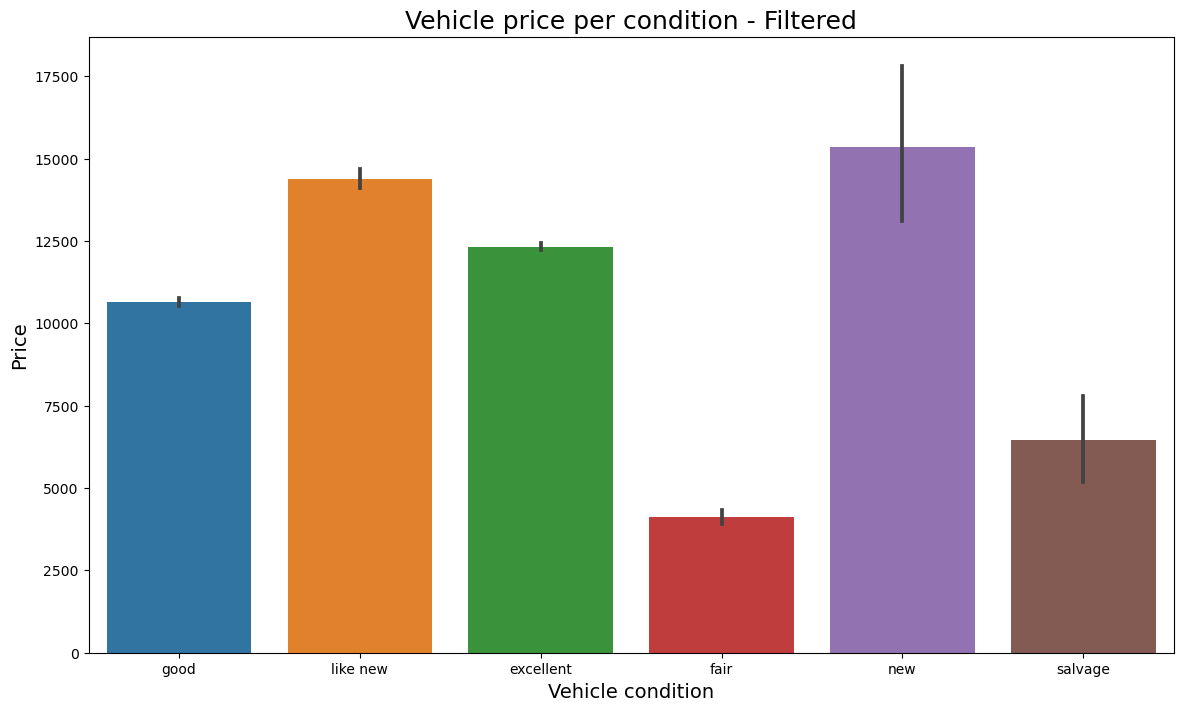

In [72]:
# Preço dos Veículos por condição

condition_graf = sns.barplot(x = 'condition', y='price', data=df_filtered, alpha= 1)
condition_graf.figure.set_size_inches(14, 8)    
condition_graf.set_title('Vehicle price per condition - Filtered', fontsize=18)
condition_graf.set_xlabel('Vehicle condition', fontsize=14)
condition_graf.set_ylabel('Price', fontsize=14)

condition_graf;

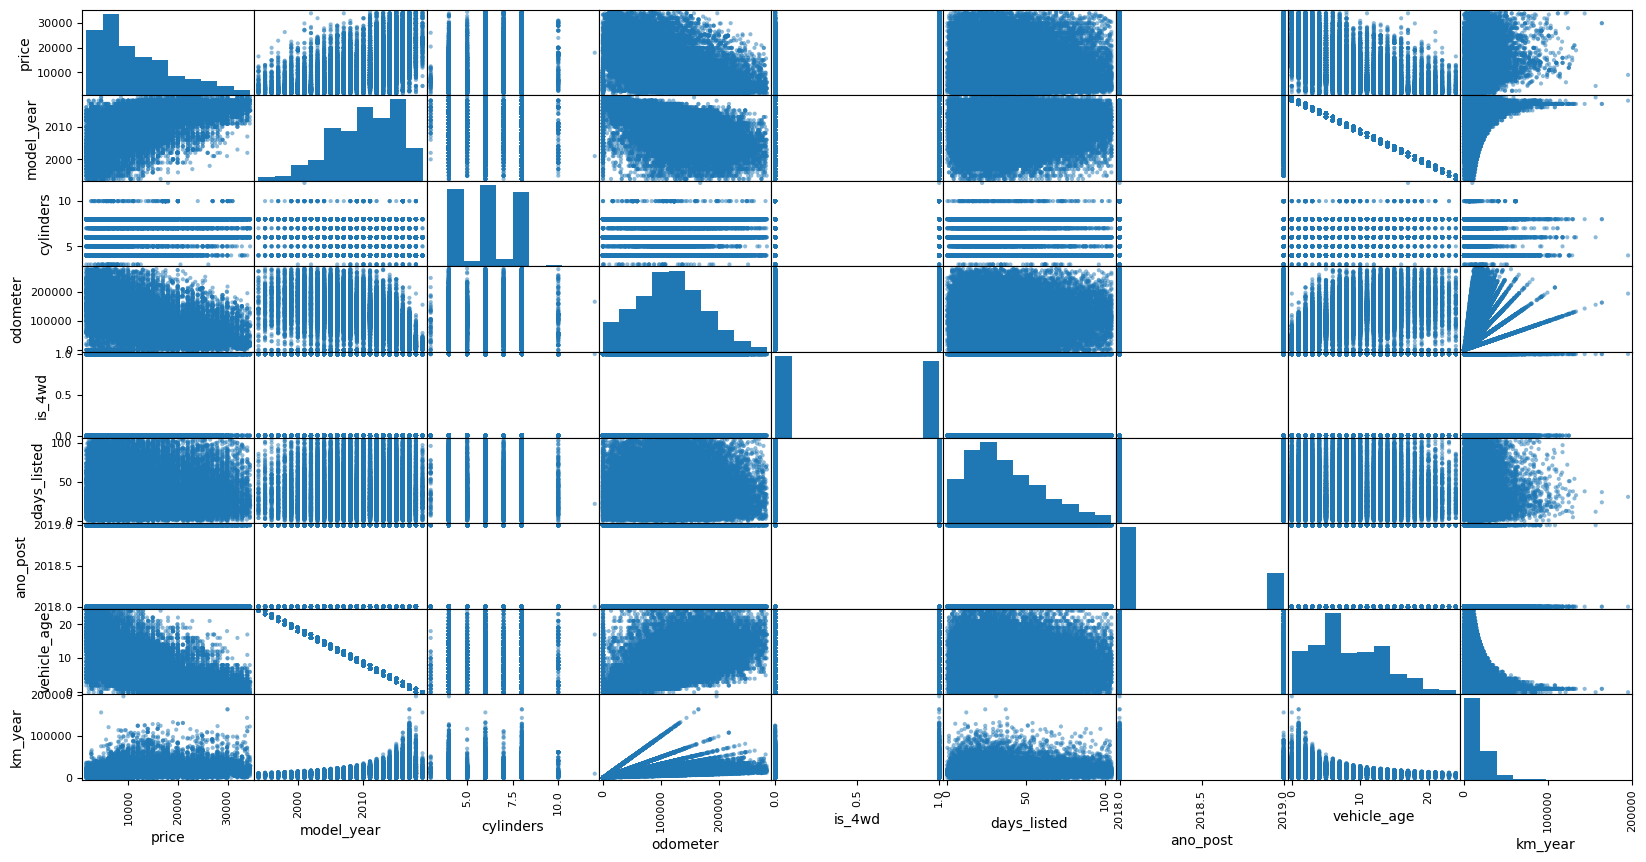

In [73]:
# Matriz de correlação do DataFrame filtrado
pd.plotting.scatter_matrix(df_filtered, figsize=(20, 10));

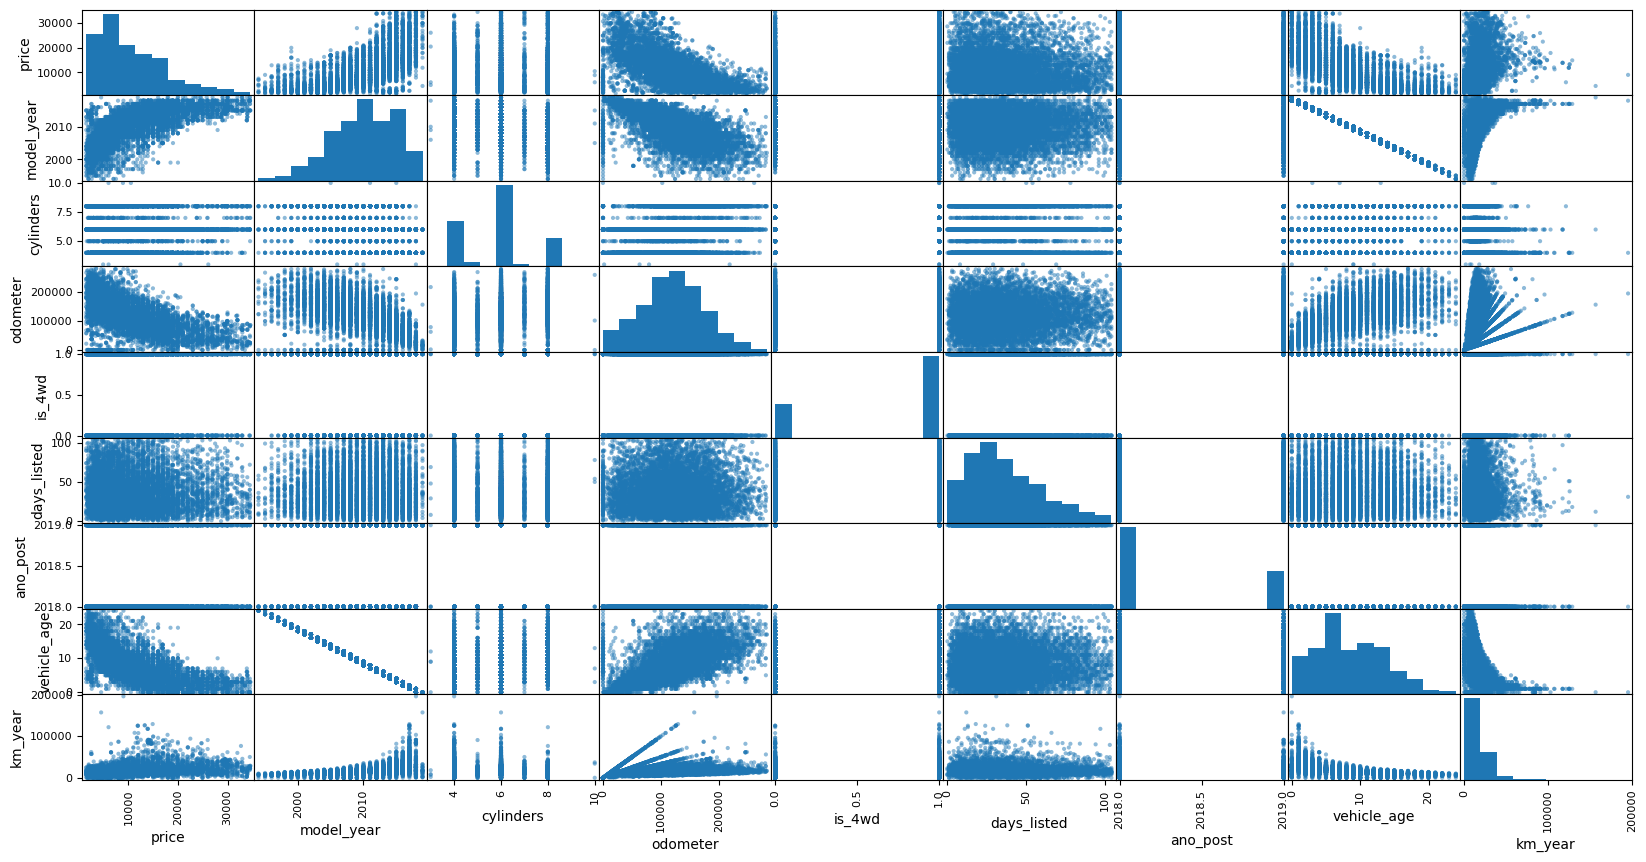

In [74]:
# Matriz de correlação do veículo tipo SUV
pd.plotting.scatter_matrix(df_filtered[df_filtered['type'] == 'SUV'], figsize=(20, 10));

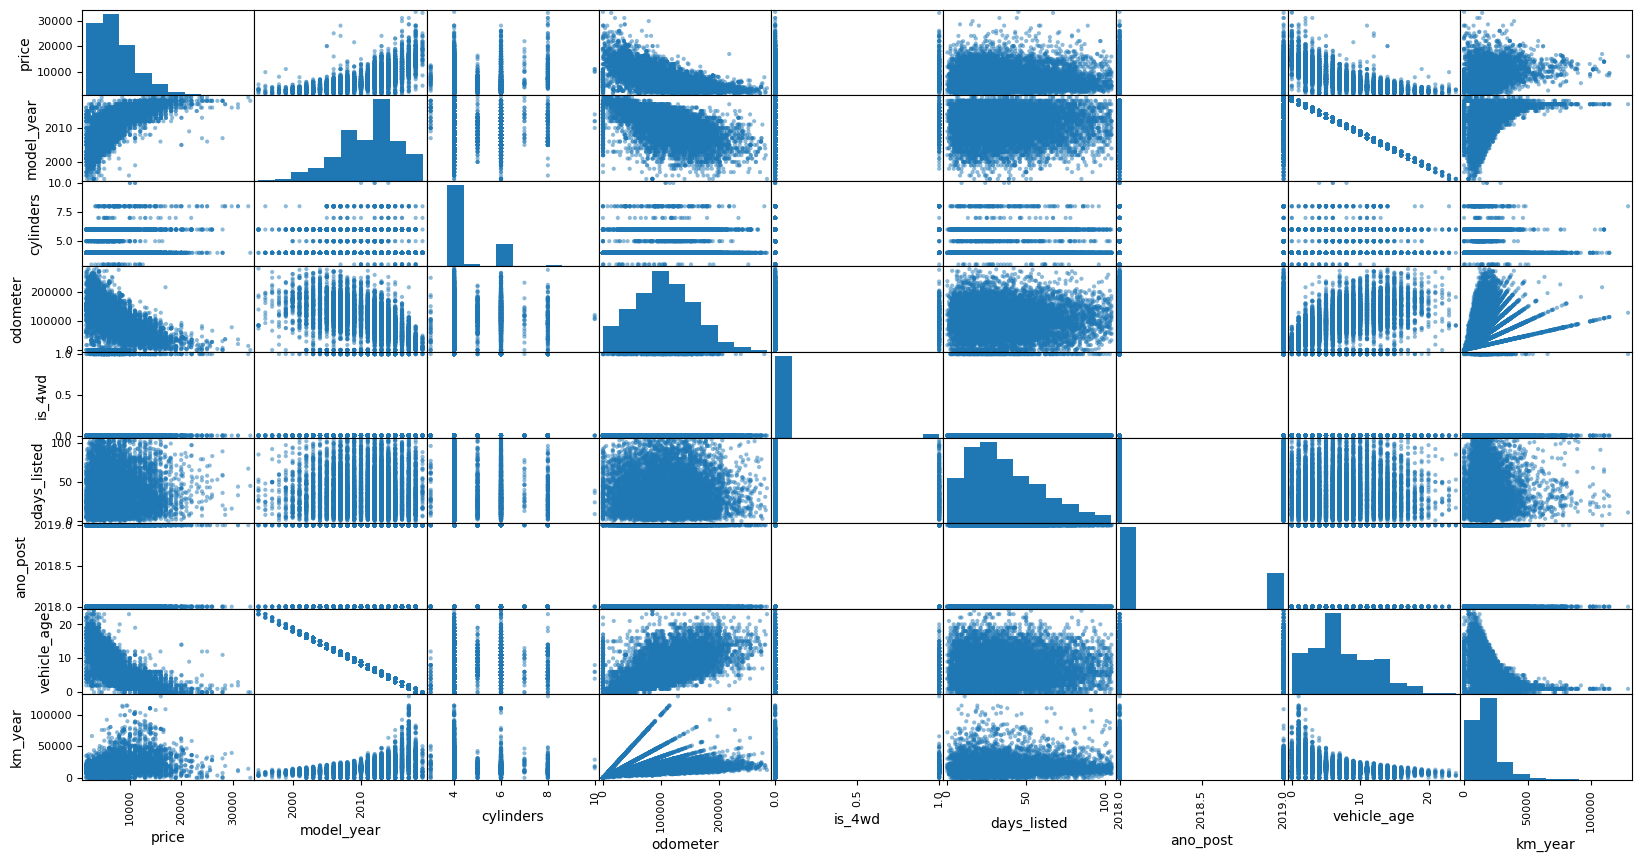

In [75]:
# Matriz de correlação do veículo tipo Sedan
pd.plotting.scatter_matrix(df_filtered[df_filtered['type'] == 'sedan'], figsize=(20, 10));

## Conclusão geral

No decorrer da análise, houveram a ocorrência alguns valores eivados de erros, que foram solucionados no decorrer da análise conforme saltavam às vistas, como por exemplo, duplicatas implícitas, valores ausentes, valores atípicos e etc. O dados com valores ausentes que mais predominaram foram os da coluna “is_4wd”, que possuíam um pouco mais de 50% de sua totalidade como ausente, devido ao fato de ser uma coluna de boelanos que só numera o valor “True” como 1, o False não foi atribuído nenhum valor, logo, essa coluna foi corrigida por lógica. 

Elementos chaves foram criados no DataFrame para auxiliar na obtenção de êxito da análise proposta, como a coluna de ano e idade do veículo. Foi necessário também a criação de intervalos interquartis (IQR) para a identificação e tratamento dos valores atípicos, presentes no DataFrame.

Após a criação desses elementos que ajudaram na consecução da análise, o DataFrame original foi filtrado criando outro com os dados limpos. Uma vez emendado, o DataFrame, verificou-se através de análise gráfica dos dados, de caixa, histogramas e de barras, que os tipos de veículos com mais anúncios eram os SUVs e sedans, com uma contagem de 12405 e 12154 de anúncios, respectivamente, no DataFrame Original.

Verificou-se também que a média de dias que um veículo fica em anúncio é de 40 dias. Tendo seus valores atípicos acima de 104 dias, e seu atípico máximo em 271 dias.
Os veículos com os preços médias mais altos foram, respectivamente, ônibus, caminhão, e pick-ups. No gráfico de caixa que foi plotado ficou bem clara essa informação. 
Também fora observado a correlação das cores com o preço, bem, os carros mais caros da base de dados foram os veículos das cores laranja e amarelo, o que pode destoar da realidade já que havia muitos dados ausentes nessa coluna. 

A condição de novo são os carros com os maiores valores dentro dessa coluna o que já era esperado. 
Por último a matriz de correlação trouxe à tona as principais variáveis que afetam o preço dos veículos. Diante de todo o exposto dessa análise dos dados fornecidos pela concessionária, conclui-se que os fatores que mais impactam no preço do veículo são:
    - O ano do modelo, com uma correlação positiva de 0,71;
    - A quilometragem com uma correlação negativa de 0,62;
    - E a idade do veículo como uma correlação negativa de 0,7.

A utilização de gráficos como boxplot, heatmap, histogramas, barras e a matriz de correlação, corroborou para a identificar tais fatores que atuam na formação de preço dos veículos.
